## Load libraries

In [1]:
# tensorflow backend
%load_ext autoreload
%autoreload 2
from os import environ
environ['KERAS_BACKEND'] = 'tensorflow'
# vae stuff
from chemvae.vae_utils import VAEUtils
from chemvae import mol_utils as mu
# import scientific py
import numpy as np
import pandas as pd
# rdkit stuff
from rdkit.Chem import AllChem as Chem
from rdkit.Chem import PandasTools
# plotting stuff
import matplotlib.pyplot as plt
import matplotlib as mpl
from IPython.display import SVG, display
import chemvae
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


Using TensorFlow backend.


# Load a model

In [49]:
chemvae.__path__

['/Users/apple/anaconda3/envs/chemvae/lib/python3.6/site-packages/chemvae']

In [2]:
import os
os.chdir("/Users/apple/Desktop/鋰電池電解液/VAE_molecule/chemical_vae/models/MP_zinc")

print(os.getcwd())

vae = VAEUtils()

/Users/apple/Desktop/鋰電池電解液/VAE_molecule/chemical_vae/models/MP_zinc
hellow world


/Users/apple/anaconda3/envs/chemvae/lib/python3.6/site-packages/keras/models.py:251: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


Using standarized functions? True
Standarization: estimating mu and std values ...the program had really come to here!!
Now we gonna to save the latentspace of MP_zinc !!
(17810, 196)
done!


# Using the VAE


## Decode/Encode 

Might not be perfect (it's probabilistic), try it several times.

smiles <i class="fa fa-arrow-right" aria-hidden="true"></i> x <i class="fa fa-arrow-right" aria-hidden="true"></i> z <i class="fa fa-arrow-right" aria-hidden="true"></i> x_r <i class="fa fa-arrow-right" aria-hidden="true"></i> smiles_r

In [54]:
import Levenshtein  
#smiles_1 = mu.canon_smiles('Cn1nccc1I')    # 0~10_zinc
#smiles_1 = mu.canon_smiles('Oc1ccsc1O')    # 0~10_MP

#smiles_1 = mu.canon_smiles('Cc1ccc(F)c(Br)n1')     # 10~20_zinc
#smiles_1 = mu.canon_smiles('C=CC1=C(C)OC=CO1')     # 10~20_MP

#smiles_1 = mu.canon_smiles('Cc1cc(Br)ccc1CNC(=O)C1CC=CC1')     # 20~30_zinc 
#smiles_1 = mu.canon_smiles('CN(C)C1=COC=C(N(C)C)O1')     # 20~30_MP

#smiles_1 = mu.canon_smiles('Cc1cc(Cl)ccc1OCC(=O)N/N=C/c1ccccn1')     # 30~40_zinc 
# smiles_1 = mu.canon_smiles('CN(C)[C@@H]1OCCO[C@@H]1c1ccccc1')     # 30~40_MP

#smiles_1 = mu.canon_smiles('Cc1nc2c(c(Nc3ncc(C)s3)n1)CCN(C(=O)CCc1ccccc1)C2')     # 40~50_zinc
#smiles_1 = mu.canon_smiles('CN1CCN(C)[C@H]([N+](=O)[O-])[C@@H]1[N+](=O)[O-]')     # 40~50_MP

#smiles_1 = mu.canon_smiles('CCOC(=O)[C@@H]1CCCN(C(=O)c2nc(-c3ccc(C)cc3)n3c2CCCCC3)C1')     # 50~60_zinc
# smiles_1 = mu.canon_smiles('COCCOCCOCCOCN1C=CC(=C2C=CN(C)C(C(Cl)(Cl)Cl)=C2)C=C1')     # 50~60_MP

#smiles_1 = mu.canon_smiles('CC(=O)Nc1c2n(c3ccccc13)C[C@](C)(C(=O)NC1CCCCC1)N(C1CCCCC1)C2=O')     # 60~70_zinc
#smiles_1 = mu.canon_smiles('c1ccc2c(c1)ccc1[nH]c3ccc4c(c3c12)[C@@H]1[C@@H]2[C@H]4[C@@H]21')     # 60~70_MP

#smiles_1 = mu.canon_smiles('CC(=O)N[C@@H]1C(=O)C[C@@H]2[C@H]3CCC4=CC(=O)CC[C@@]4(C)[C@@H]3CC[C@]12C')     # 70~80_zinc 
#smiles_1 = mu.canon_smiles('O=c1c2ccc3c4ccc5c6c(ccc(c7ccc(c2c37)c2nc3ccccc3n12)c46)c(=O)n1c2ccccc2nc51')     # 70~80_MP

smiles_1 = mu.canon_smiles('CC(C)(C)c1ccc2occ(CC(=O)Nc3ccccc3F)c2c1')    # test


X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)


z_1 = vae.encode(X_1,False)


print(z_1.shape)


# # X_r= vae.decode(z_1)
# list_score = [] 
# print('{:24s} : {}'.format('input',smiles_1))
# for i in range(1):
#     try:
#         z_1 = vae.encode(X_1)
#         X_r= vae.decode(z_1)
#         smile_r = vae.hot_to_smiles(X_r,strip=True)[0]
#         if i < 10:
#             print('{:20s} : {}'.format('reconstruction',smile_r))
# #         print('{:20s} : {}'.format('Reconstruction',vae.hot_to_smiles(X_r,strip=True)[0]))
# #         print(Levenshtein.hamming(smiles_1,smile_r))
#         list_score.append(Levenshtein.distance(smiles_1,smile_r))
#     except:
#         pass
# print('the length of input smile:',len(smiles_1))

# print("test 100 times ")

# print('avg error:', sum(list_score)/len(list_score))
# print('avg error ratio:',(sum(list_score)/len(list_score))/len(smiles_1))



(1, 196)


In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
import pandas as pd 
import numpy as np 

error = 0 
valid_smile = []
mols = [] 
ls = np.load("./latenspace_MP_zinc_test.npy")
df_ls = pd.DataFrame(ls)
df_ls_distribution = df_ls.describe()
ls_range = df_ls_distribution.loc[["min","max"],:]
ls_sample = np.zeros((1,196))

for t in range(10):
    for i in range(196):
        ls_sample[0,i] = np.random.uniform(ls_range[i][0], ls_range[i][1])
    df = vae.z_to_smiles(ls_sample, decode_attempts=50, noise_norm=0.0)
    try: 
        smile = df[df["count"] == df["count"].max()]["smiles"][0]
        print(smile)
        valid_smile.append(smile)
        mols.append(Chem.MolFromSmiles(smile))
    except :
        print("There are no smiles could be generated")
        error+=1
    

# img=Draw.MolsToGridImage(mols[:20],molsPerRow=4,subImgSize=(200,200),useSVG=True,highlightAtomLists=highlightAtomList)
img=Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(200,200),useSVG=True)
# img.save("C=CN_1840_structure.png")
img
print("error times",error)

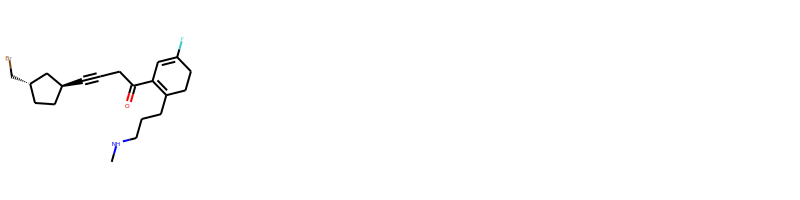

In [115]:
img=Draw.MolsToGridImage(mols,molsPerRow=4,subImgSize=(200,200), useSVG=True)
img

In [ ]:
import ML_utils
ls = np.load("./latenspace_MP_zinc_test.npy")
df_ls = pd.DataFrame(ls)
df_ls_distribution = df_ls.describe()
ls_range = df_ls_distribution.loc[["min","max"],:]
ls_sample = np.zeros((1,196))

noise =1
decodeattempts = 500

for i in range(196):
    ls_sample[0,i] = np.random.uniform(ls_range[i][0], ls_range[i][1])
property_value = vae.predict_prop_Z(ls_sample,False)

df = vae.z_to_smiles(ls_sample, decode_attempts=decodeattempts, noise_norm=noise)
# try: 
# smile = df[df["count"] == df["count"].max()]["smiles"][0]
# list_2_3.append(smile)

In [24]:
import ML_utils
from rdkit.Chem import AllChem
from rdkit import Chem, DataStructs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import classification_report,confusion_matrix
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import mean_squared_error, mean_absolute_error
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
from sklearn.model_selection import train_test_split
import openbabel
import os
def filter_IE(list_smile, IE_range):
    data_ECFP_num= ML_utils.featurize(list_smile, do_smile2ECFP_2048_number=True)
    data_SYBYL_ECFP = ML_utils.featurize(list_smile, do_smile2_SYBYL_ECFP=True)

    ECFPNUM_IE_predictor= joblib.load('./ECFPNUM_IE.pkl')
    SYBYL_ECFP_IE_predictor = joblib.load('./SYBYLECFP_IE.pkl')

    data_ECFP_num['IE'] = ECFPNUM_IE_predictor.predict(data_ECFP_num[["num_"+str(i) for i in range(2048)]])
    data_SYBYL_ECFP['IE'] = SYBYL_ECFP_IE_predictor.predict(data_SYBYL_ECFP.drop(['smile'], axis=1))
    list_IE = list(set(data_ECFP_num[(data_ECFP_num['IE'] > IE_range[0]) & (data_ECFP_num['IE'] < IE_range[1])]['smile']) &
                   set(data_SYBYL_ECFP[(data_SYBYL_ECFP['IE'] > IE_range[0]) & (data_SYBYL_ECFP['IE'] < IE_range[1])]['smile']))
    return list_IE
# list_3_4 = filter_IE(list(data['smiles']),[3,4])
# list_3_4
list_3_4 = filter_IE(list(df['smiles']),[3,4])
list_3_4

[]

In [ ]:
list_2_3 = [] 
list_3_4 = []
list_4_5 = []
list_5_6 = [] 
ls = np.load("./latenspace_MP_zinc_test.npy")
df_ls = pd.DataFrame(ls)
df_ls_distribution = df_ls.describe()
ls_range = df_ls_distribution.loc[["min","max"],:]
ls_sample = np.zeros((1,196))

noise =1
decodeattempts = 400

for t in range(10):
    print("this is the",t,"loop")
    for i in range(196):
        ls_sample[0,i] = np.random.uniform(ls_range[i][0], ls_range[i][1])
    property_value = vae.predict_prop_Z(ls_sample,False)

    if (property_value > 2 and  property_value < 3) :
        df = vae.z_to_smiles(ls_sample, decode_attempts=decodeattempts, noise_norm=noise)
        try: 
            list_meet = filter_IE(list(df['smiles']),[2,3])
            for smile in list_meet:
                list_2_3.append(smile)
        except :
            pass

    elif (property_value > 3 and  property_value < 4) :
        df = vae.z_to_smiles(ls_sample, decode_attempts=decodeattempts, noise_norm=noise)
        try: 
            list_meet = filter_IE(list(df['smiles']),[3,4])
            for smile in list_meet:
                list_2_3.append(smile)
        except :
            pass

    elif (property_value > 4 and  property_value < 5) :
        df = vae.z_to_smiles(ls_sample, decode_attempts=decodeattempts, noise_norm=noise)
        try: 
            list_meet = filter_IE(list(df['smiles']),[4,5])
            for smile in list_meet:
                list_2_3.append(smile)
        except :
            pass
    elif (property_value > 5 and  property_value < 6) :
        df = vae.z_to_smiles(ls_sample, decode_attempts=decodeattempts, noise_norm=noise)
        try: 
             list_meet = filter_IE(list(df['smiles']),[5,6])
            for smile in list_meet:
                list_2_3.append(smile)
        except :
            pass
    else:
        print(property_value)
        
print(len(list_2_3))
print(len(list_3_4))
print(len(list_4_5))
print(len(list_5_6))
print("the ss")

In [ ]:
smiles_1 = mu.canon_smiles('CCCc1cc(NC(=O)CN2C(=O)NC3(CCC(C)CC3)C2=O)n(C)n1')    # test
X_1 = vae.smiles_to_hot(smiles_1,canonize_smiles=True)
z_1 = vae.encode(X_1,False)


df = vae.z_to_smiles(z_1, decode_attempts=500, noise_norm=10)
display(df)
display(PandasTools.FrameToGridImage(df,column='mol',molsPerRow=4, legendsCol='distance', subImgSize=(300,300)))

In [ ]:
z

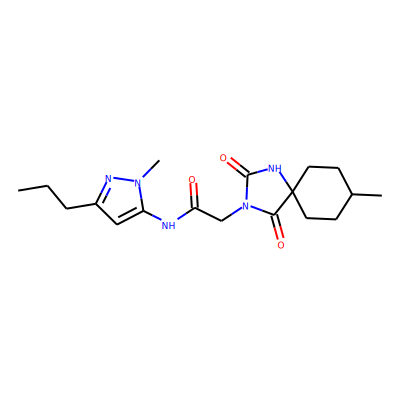

In [26]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG
from rdkit.Chem import rdDepictor
from rdkit.Chem.Draw import rdMolDraw2D
from rdkit.Chem import Draw
list_smile = ['CCCc1cc(NC(=O)CN2C(=O)NC3(CCC(C)CC3)C2=O)n(C)n1']
img=Draw.MolsToGridImage([Chem.MolFromSmiles(smile) for smile in list_smile],molsPerRow=1,subImgSize=(400,400),useSVG=True)
display(img)

## property preditor

In [220]:
print('Properties (qed,SAS,logP):')
y_1 = vae.predict_prop_Z(z_1)
print(y_1)

Properties (qed,SAS,logP):
[[3.1159394]]


In [245]:
# this is the optimize process in the latent space.
%load_ext autoreload
%autoreload 2
from scipy import optimize
import numpy as np 
for i in range(
    print(str(i)+"_attemp")
    initial = np.random.rand(1,196)
    print(initial.shape)
    res1 = optimize.fmin_cg(vae.predict_prop_Z, initial,full_output=True)
    y_1 = vae.predict_prop_Z(initial)
    print(y_1)
# 

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
0_attemp
(1, 196)
x0 shape is(196,)
         Current function value: 2.921356
         Iterations: 1
         Function evaluations: 27986
         Gradient evaluations: 71
[[2.9213564]]


## Decode several attempts
VAE are probabilistic

In [55]:
noise=5.0
print('Searching molecules randomly sampled from {:.2f} std (z-distance) from the point'.format(noise))
df = vae.z_to_smiles( z_1,decode_attempts=100,noise_norm=noise)
print('Found {:d} unique mols, out of {:d}'.format(len(set(df['smiles'])),sum(df['count'])))
print('SMILES\n',df.smiles)
# display(PandasTools.FrameToGridImage(df,column='mol', legendsCol='smiles',molsPerRow=5))
df.head()

Searching molecules randomly sampled from 5.00 std (z-distance) from the point
Found 0 unique mols, out of 0
SMILES
 Series([], Name: smiles, dtype: object)


,smiles,count,mol


## PCA of latent space

Sample random points from the training set along with properties

In [ ]:
Z, data, smiles = vae.ls_sampler_w_prop(size=5000,return_smiles=True)
prop_opt = 'qed'
prop_df = pd.DataFrame(data).reset_index()
prop_df['smiles']=smiles
prop_df.head()

Perform a PCA projection and color the points based on a property

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

# do pca and normalize
Z_pca = PCA(n_components=2).fit_transform(Z)
Z_pca = MinMaxScaler().fit_transform(Z_pca)

df = pd.DataFrame(np.transpose((Z_pca[:,0],Z_pca[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()

compare with t-SNE, will take some time

In [ ]:
from sklearn.manifold import TSNE

Z_tsne = TSNE(n_components=2).fit_transform(Z)
Z_tsne = MinMaxScaler().fit_transform(Z_tsne)

f = pd.DataFrame(np.transpose((Z_tsne[:,0],Z_tsne[:,1])))
df.columns = ['x','y']
df[prop_opt]=prop_df[prop_opt]

plt.scatter(x=df['x'], y=df['y'], c=df[prop_opt],
            cmap= 'viridis', marker='.',
            s=10,alpha=0.5, edgecolors='none')
plt.show()